In [ ]:
#! pip install plotly

In [1]:
import pandas as pd
from config import api_key
import plotly.plotly as py
import plotly
plotly.tools.set_credentials_file(username='ksandez', api_key=api_key)
import plotly.graph_objs as go
import gzip
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Stanford Mass Shootings of America Dataset & then plot in Pie chart

In [2]:
msa_df = pd.read_csv('mass_shooting_events_stanford_msa_release_06142016_ks.csv')
msa_df.head()

,CaseID,Title,Location,City,State,Abbrev,Latitude,Longitude,Number of Victim Fatalities,Total Number of Fatalities,...,History of Mental Illness - General,Data Source 1,Data Source 2,Data Source 3,Data Source 4,Data Source 5,Data Source 6,Data Source 7,Military Experience,Class
0,1,University of Texas at Austin,"Austin, Texas",Austin,Texas,TX,30.198887,-97.844159,16,17,...,Yes,http://en.wikipedia.org/wiki/Charles_Whitman,"Lexington Examiner (KY) - September 23, 2012",http://news.google.com/newspapers?id=lkk0AAAAI...,http://news.google.com/newspapers?id=PPUjAAAAI...,http://books.google.com/books?id=ClYEAAAAMBAJ&...,NaN,NaN,Yes,SPK
1,2,Rose-Mar College of Beauty,"Mesa, Arizona",Mesa,Arizona,AZ,33.422687,-111.816320,5,5,...,Yes,"""Slaughter In The College Of Beauty."" Time 88....",Section: Lexington True Crime Examiner,http://www.nydailynews.com/news/crime/beauty-s...,http://books.google.com/books?id=Cre7qsswRiwC&...,NaN,NaN,NaN,Unknown,MS
2,3,New Orleans Police Shootings,"New Orleans, Louisiana",New Orleans,Louisiana,LA,30.068724,-89.931474,9,10,...,Yes,http://news.google.com/newspapers?nid=1144&dat...,http://theadvocate.com/home/4828836-125/rampag...,http://www.trutv.com/library/crime/notorious_m...,http://books.google.com/books?id=TfEDmROcZwEC&...,NaN,NaN,NaN,Unknown,SPK
3,4,Clara Barton Elementary School,"Chicago, Illinois",Chicago,Illinois,IL,41.839280,-87.688181,1,1,...,Yes,http://news.google.com/newspapers?nid=1338&dat...,http://news.google.com/newspapers?nid=1144&dat...,http://www.leagle.com/xmlResult.aspx?page=1&xm...,NaN,NaN,NaN,NaN,Unknown,MS
4,5,Olean High School,"Olean, New York",Olean,New York,NY,42.081854,-78.432139,3,3,...,No,http://buffalo.ynn.com/content/top_stories/622...,School Shootings: a History Part One of a seri...,http://www.newswithviews.com/Erica/Carle10.htm,http://books.google.com/books?id=ZuKoSskEWyIC&...,"""Olean High School Shooting"". Larrie Benton Za...",NaN,NaN,Unknown,MS


In [3]:
msa_df.columns

Index(['CaseID', 'Title', 'Location', 'City', 'State', 'Abbrev', 'Latitude',
       'Longitude', 'Number of Victim Fatalities',
       'Total Number of Fatalities', 'Number of Victims Injured',
       'Total Number of Victims', 'Description', 'Date', 'Day of Week',
       'Date - Detailed', 'Shooter Name', 'Shooter Age(s)',
       'Average Shooter Age', 'Shooter Sex', 'Shooter Race',
       'Type of Gun - Detailed', 'Type of Gun - General', 'Number of Shotguns',
       'Number of Rifles', 'Number of Handguns', 'Total Number of Guns',
       'Number of Automatic Guns', 'Number of Semi-Automatic Guns',
       'Fate of Shooter at the scene', 'Shooter's Cause of Death',
       'School Related', 'Place Type', 'Relationship to Incident Location',
       'Targeted Victim/s - Detailed', 'Targeted Victim/s - General',
       'Possible Motive - Detailed', 'Possible Motive - General',
       'History of Mental Illness - Detailed',
       'History of Mental Illness - General', 'Data Source 1', 'Da

In [4]:
msa_df['Shooter Race'].unique()

array(['White American or European American',
       'Black American or African American', 'Unknown', 'Asian American',
       'Some other race', 'Native American or Alaska Native',
       'Asian American/Some other race', 'Two or more races',
       'White American or European American/Some other Race',
       'Black American or African American/Unknown'], dtype=object)

In [5]:
msa_df['Shooter Race'] = msa_df['Shooter Race'].replace(
    {'White American or European American':'White','Black American or African American':'African American',
     'Asian American':'Asian','Unknown':'Other','Some other race':'Other','Asian American/Some other race':'Asian',
     'Native American or Alaska Native':'Native American','White American or European American/Some other Race':'White',
     'Black American or African American/Unknown':'African American'})
msa_df.head()

,CaseID,Title,Location,City,State,Abbrev,Latitude,Longitude,Number of Victim Fatalities,Total Number of Fatalities,...,History of Mental Illness - General,Data Source 1,Data Source 2,Data Source 3,Data Source 4,Data Source 5,Data Source 6,Data Source 7,Military Experience,Class
0,1,University of Texas at Austin,"Austin, Texas",Austin,Texas,TX,30.198887,-97.844159,16,17,...,Yes,http://en.wikipedia.org/wiki/Charles_Whitman,"Lexington Examiner (KY) - September 23, 2012",http://news.google.com/newspapers?id=lkk0AAAAI...,http://news.google.com/newspapers?id=PPUjAAAAI...,http://books.google.com/books?id=ClYEAAAAMBAJ&...,NaN,NaN,Yes,SPK
1,2,Rose-Mar College of Beauty,"Mesa, Arizona",Mesa,Arizona,AZ,33.422687,-111.816320,5,5,...,Yes,"""Slaughter In The College Of Beauty."" Time 88....",Section: Lexington True Crime Examiner,http://www.nydailynews.com/news/crime/beauty-s...,http://books.google.com/books?id=Cre7qsswRiwC&...,NaN,NaN,NaN,Unknown,MS
2,3,New Orleans Police Shootings,"New Orleans, Louisiana",New Orleans,Louisiana,LA,30.068724,-89.931474,9,10,...,Yes,http://news.google.com/newspapers?nid=1144&dat...,http://theadvocate.com/home/4828836-125/rampag...,http://www.trutv.com/library/crime/notorious_m...,http://books.google.com/books?id=TfEDmROcZwEC&...,NaN,NaN,NaN,Unknown,SPK
3,4,Clara Barton Elementary School,"Chicago, Illinois",Chicago,Illinois,IL,41.839280,-87.688181,1,1,...,Yes,http://news.google.com/newspapers?nid=1338&dat...,http://news.google.com/newspapers?nid=1144&dat...,http://www.leagle.com/xmlResult.aspx?page=1&xm...,NaN,NaN,NaN,NaN,Unknown,MS
4,5,Olean High School,"Olean, New York",Olean,New York,NY,42.081854,-78.432139,3,3,...,No,http://buffalo.ynn.com/content/top_stories/622...,School Shootings: a History Part One of a seri...,http://www.newswithviews.com/Erica/Carle10.htm,http://books.google.com/books?id=ZuKoSskEWyIC&...,"""Olean High School Shooting"". Larrie Benton Za...",NaN,NaN,Unknown,MS


In [6]:
msa_df['Shooter Race'].unique()

array(['White', 'African American', 'Other', 'Asian', 'Native American',
       'Two or more races'], dtype=object)

In [7]:
test = msa_df[msa_df['Date'].str.contains('2014|2015|2016')]
test.columns

Index(['CaseID', 'Title', 'Location', 'City', 'State', 'Abbrev', 'Latitude',
       'Longitude', 'Number of Victim Fatalities',
       'Total Number of Fatalities', 'Number of Victims Injured',
       'Total Number of Victims', 'Description', 'Date', 'Day of Week',
       'Date - Detailed', 'Shooter Name', 'Shooter Age(s)',
       'Average Shooter Age', 'Shooter Sex', 'Shooter Race',
       'Type of Gun - Detailed', 'Type of Gun - General', 'Number of Shotguns',
       'Number of Rifles', 'Number of Handguns', 'Total Number of Guns',
       'Number of Automatic Guns', 'Number of Semi-Automatic Guns',
       'Fate of Shooter at the scene', 'Shooter's Cause of Death',
       'School Related', 'Place Type', 'Relationship to Incident Location',
       'Targeted Victim/s - Detailed', 'Targeted Victim/s - General',
       'Possible Motive - Detailed', 'Possible Motive - General',
       'History of Mental Illness - Detailed',
       'History of Mental Illness - General', 'Data Source 1', 'Da

In [8]:
test_df = test.groupby('Shooter Race').count()['CaseID']

In [9]:
test_df = test_df.sort_values()

In [ ]:
#msa_2015_cnt = test[test['Date'].str.contains('2015')]

In [10]:
test_df.keys()

Index(['Native American', 'Two or more races', 'Asian', 'African American',
       'White', 'Other'],
      dtype='object', name='Shooter Race')

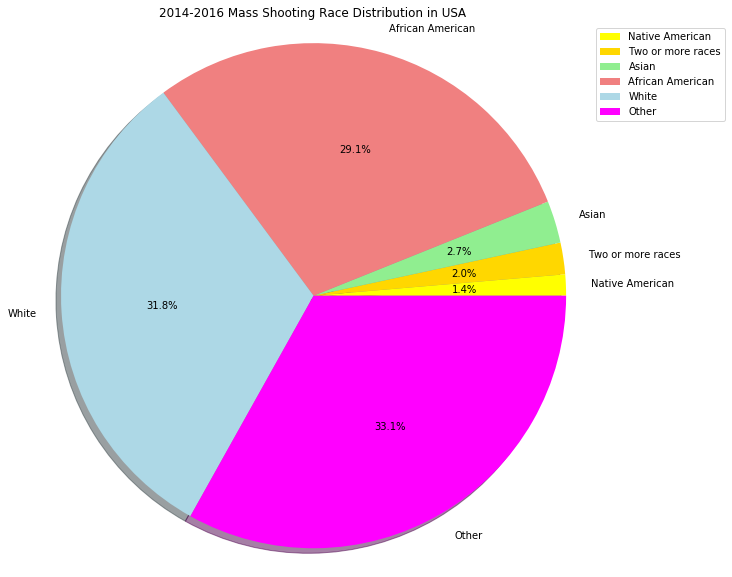

In [11]:
plt.figure(figsize=(10,10))
#sns.set_context("talk", font_scale=1.1)
#plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=.5)
labels = test_df.keys()

# Tells matplotlib to seperate the "Python" section from the others meaning the exploding part
colors = ["yellow", "gold", "lightgreen", "lightcoral", "lightblue", "magenta"]

plt.pie(test_df, labels=labels, colors=colors, shadow=True, autopct = "%1.1f%%") #startangle=140)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.title("2014-2016 Mass Shooting Race Distribution in USA")
plt.axis('equal')

plt.savefig("2014-2016 Mass Shooting Race Distribution in USA.png", transparent=True, bbox_inches='tight', pad_inches=0)
plt.show()

In [12]:
import os
os.getcwd()

'C:\\Users\\kryst\\Desktop\\TeamProject1_Shooter\\KS'

### Combine 2014-2016 Census data & then plot in Pie chart

In [13]:
l = ['2014', '2015', '2016']
df = pd.DataFrame()
for i in l:
    df = df.append(pd.read_csv(f'data_cleaned/race_by_state_{i}.csv'), ignore_index = True)
df.shape

(153, 16)

In [14]:
df.columns

Index(['State', 'Total', 'White', 'African American', 'Native American',
       'Asian', 'Pacific Islander', 'Other', 'Two or more races', '% White',
       '% African American', '% Native American', '% Asian',
       '% Pacific Islander', '% Other', '% Two or more races'],
      dtype='object')

In [15]:
df['Other'] = df['Pacific Islander'] + df['Other']
df.drop(['Pacific Islander'], axis = 1, inplace = True)
df.head()

,State,Total,White,African American,Native American,Asian,Other,Two or more races,% White,% African American,% Native American,% Asian,% Pacific Islander,% Other,% Two or more races
0,Alabama,4849377,3320273,1291826,22553,58456,71305,84964,0.684680,0.266390,0.004651,0.012054,0.000298,0.014406,0.017521
1,Alaska,736732,483584,24790,103273,43915,18362,62808,0.656391,0.033649,0.140177,0.059608,0.011395,0.013529,0.085252
2,Arizona,6731484,5273335,280518,294757,212116,446655,224103,0.783384,0.041673,0.043788,0.031511,0.001890,0.064463,0.033292
3,Arkansas,2966369,2322472,468231,17091,36555,57533,64487,0.782934,0.157847,0.005762,0.012323,0.002410,0.016985,0.021739
4,California,38802500,23814044,2259681,286631,5398090,5264265,1779789,0.613724,0.058235,0.007387,0.139117,0.003868,0.131801,0.045868


In [16]:
racetotals = {"Total": df.Total.sum(),
             "White": df.White.sum(),
             "African American": df["African American"].sum(),
             "Native American": df["Native American"].sum(),
              "Asian": df.Asian.sum(),
              "Other": df.Other.sum(),
              "Two or more races": df["Two or more races"].sum()}

In [17]:
racetotals

{'African American': 121967712,
 'Asian': 51517672,
 'Native American': 7875362,
 'Other': 48481643,
 'Total': 963403392,
 'Two or more races': 30013736,
 'White': 703547267}

In [18]:
racetotals.pop('Total')

963403392

In [19]:
racetotals

{'African American': 121967712,
 'Asian': 51517672,
 'Native American': 7875362,
 'Other': 48481643,
 'Two or more races': 30013736,
 'White': 703547267}

In [20]:
racetotals.keys()

dict_keys(['White', 'African American', 'Native American', 'Asian', 'Other', 'Two or more races'])

In [21]:
racetotals.values()

dict_values([703547267, 121967712, 7875362, 51517672, 48481643, 30013736])

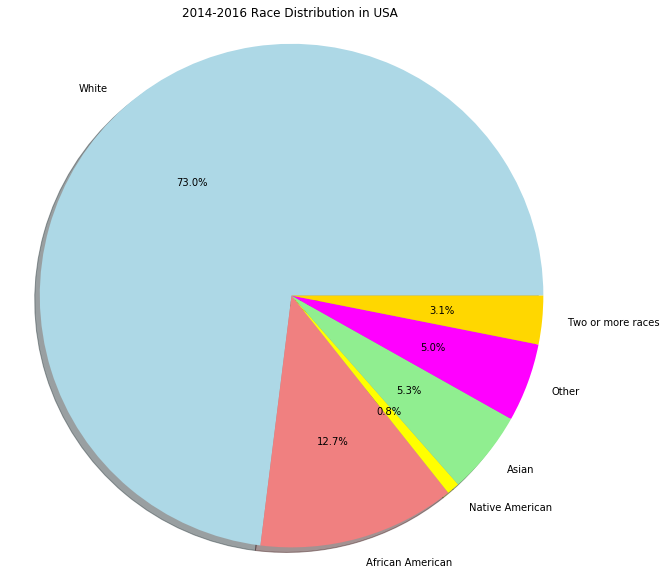

In [22]:
labels = racetotals.keys()

#sizes = [185, 172, 100, 110]
plt.figure(figsize = (10,10))
# Tells matplotlib to seperate the "Python" section from the others meaning the exploding part
colors = ["lightblue", "lightcoral", "yellow", "lightgreen","magenta","gold"]

plt.pie(racetotals.values(), labels=labels, colors=colors, shadow=True, autopct = "%1.1f%%") #startangle=140)
plt.title("2014-2016 Race Distribution in USA")
plt.axis('equal')

plt.savefig("2014-2016 Race Distribution in USA.png", transparent=True, bbox_inches='tight', pad_inches=0)

plt.show()

### Gun Violence Year over Year by State

#### Gun Violence Archive: Mass Shootings (2013 - 2018)


In [23]:
import os
os.getcwd()

'C:\\Users\\kryst\\Desktop\\TeamProject1_Shooter\\KS'

In [24]:
# 239677 Rows, 30 Columns
file = pd.read_csv(gzip.open('data/gun_violence_massshooting_2014-2018.csv.gz'))   
states = {
       'AK': 'Alaska',
       'AL': 'Alabama',
       'AR': 'Arkansas',
       'AS': 'American Samoa',
       'AZ': 'Arizona',
       'CA': 'California',
       'CO': 'Colorado',
       'CT': 'Connecticut',
       'DC': 'District of Columbia',
       'DE': 'Delaware',
       'FL': 'Florida',
       'GA': 'Georgia',
       'GU': 'Guam',
       'HI': 'Hawaii',
       'IA': 'Iowa',
       'ID': 'Idaho',
       'IL': 'Illinois',
       'IN': 'Indiana',
       'KS': 'Kansas',
       'KY': 'Kentucky',
       'LA': 'Louisiana',
       'MA': 'Massachusetts',
       'MD': 'Maryland',
       'ME': 'Maine',
       'MI': 'Michigan',
       'MN': 'Minnesota',
       'MO': 'Missouri',
       'MP': 'Northern Mariana Islands',
       'MS': 'Mississippi',
       'MT': 'Montana',
       'NA': 'National',
       'NC': 'North Carolina',
       'ND': 'North Dakota',
       'NE': 'Nebraska',
       'NH': 'New Hampshire',
       'NJ': 'New Jersey',
       'NM': 'New Mexico',
       'NV': 'Nevada',
       'NY': 'New York',
       'OH': 'Ohio',
       'OK': 'Oklahoma',
       'OR': 'Oregon',
       'PA': 'Pennsylvania',
       'PR': 'Puerto Rico',
       'RI': 'Rhode Island',
       'SC': 'South Carolina',
       'SD': 'South Dakota',
       'TN': 'Tennessee',
       'TX': 'Texas',
       'UT': 'Utah',
       'VA': 'Virginia',
       'VI': 'Virgin Islands',
       'VT': 'Vermont',
       'WA': 'Washington',
       'WI': 'Wisconsin',
       'WV': 'West Virginia',
       'WY': 'Wyoming'
}
states_dict = {value: key for key, value in states.items()}
file['STATE'] = file['state'].replace(states_dict)

In [ ]:
#gvms_df = pd.read_csv('data_cleaned\cleanedBigGun.csv')

#gvms_df['STATE'].unique()

In [25]:
data_df = file.groupby('STATE').sum()['sum n_killed&n_injured']
pd.DataFrame(data_df).to_csv('plot.csv')

In [26]:
data_df = pd.read_csv('plot.csv')

for col in data_df.columns:
    data_df[col] = data_df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(255,160,122)'],[0.4, 'rgb(250,128,114)'],\
            [0.6, 'rgb(255,99,71)'],[0.8, 'rgb(220,20,60)'],[1.0, 'rgb(178,34,34)']]

data_df['text'] = 'Total # Injured/Fatality'

data = [dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = data_df['STATE'],
        z = data_df['sum n_killed&n_injured'].astype(float),
        locationmode = 'USA-states',
        text = data_df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Total # Injured/Fatality")
        ) ]

layout = dict(
        title = '2013 - 2018 Gun Violence in the USA',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict(data=data, layout=layout )

py.iplot(fig,file="plot.csv")

# IGNORE STUFF DOWN BELOW

In [ ]:
racebystate2014totals_df='Total',].sum()
racebystate2014totals_df

In [ ]:
gun_clean_df = pd.read_csv(gzip.open('data_cleaned/cleanedBigGun.csv.gz'))

gun_clean_df.head()

In [ ]:
sns.set(rc={"figure.figsize": (10, 10)})

injured = msa_df.groupby("Abbrev")

In [ ]:
victims_df = pd.DataFrame(injured["Number of Victims Injured"].sum())
victims_df = victims_df.reset_index()
victims_df.head()

In [ ]:
victims_df.to_csv("victims2.csv")

In [ ]:
for col in victims_df.columns:
    victims_df[col] = victims_df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

victims_df['text'] = victims_df['Abbrev'] + '<br>' +\
    'Total # Injured/Fatality: '+victims_df['Number of Victims Injured']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = victims_df['Abbrev'],
        z = victims_df['Number of Victims Injured'].astype(float),
        locationmode = 'USA-states',
        text = victims_df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Total # Injured/Fatality")
        ) ]

layout = dict(
        title = 'Mass Shooting in the USA Past 50 Years',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict(data=data, layout=layout )
py.iplot(fig,file="victims2.csv")

### Gun Violence Archive: Mass Shootings (2014 - 2018)

In [ ]:
gvms_df = pd.read_csv(gzip.open('data/gun_violence_massshooting_2014-2018.csv.gz'))

gvms_df.head()

### State Policy Database: Firearms

* Source: http://www.statepolicyindex.com/data/
* Please note that the first row is dropped, and the second row is used as the header in Pandas. Open the Excel file in Microsoft Excel to see why!

In [ ]:
gun_laws_df = pd.read_excel('data/b_guns_17.xlsx', header=1)

gun_laws_df.head()